# 第1题

下表显示了一种快餐三明治中总脂肪克数和总热量之间的关系。找出这个数据的线性回归方程。

$$
\begin{array}{ccccccc}
\hline
脂肪 (g) & 9 & 13 & 21 & 30 & 31 & 32 & 34 \\
卡路里 & 260 & 320 & 420 &  530 & 560 & 580 & 590 \\
\hline
\end{array}
$$

$$
y = 142.59469697 + 13.30492424 x
$$

# 第2题

一个节目正在开展一项“冬季大衣运动”，收集并将大衣送到当地的避难所。他们正在收集这些外套，直到达到2100件外套的目标。右边的表格显示了每天活动结束时收集的大衣数量。
$$
\begin{array}{ccccccc}
\hline
\text{活动天数} & 1  & 2 & 3 & 4 & 5 & 6 \\
\text{大衣数量} & 860 & 930 & 1000 & 1150 & 1200 & 1360 \\
\hline
\end{array}
$$

1. 确定这个数据的线性回归方程(以天数为x轴，大衣数量为y轴)

2. 利用第1问的结果，预测活动达到目标的天数。


1. $ y = 737.33333333 + 98.85714286x $
2. $x = \frac{(y - b)}{w} \longrightarrow x = 13.78420039 \simeq 14 天$

# 第3题

一杯热咖啡在冬天时温度下降的规律可以用指数回归方程$T = \alpha e ^{\beta t}$模拟，根据下表给出的数据，预测咖啡在6分钟后的温度。
$$
\begin{array}{ccccccc}
\hline
\text{时间（分钟）} & 0 & 1  & 2 & 3 & 4 & 5 \\
\text{温度（华氏）} & 180 & 160 & 138 & 125 & 110 & 95 \\
\hline
\end{array}
$$



$$t' = t, T' = ln(T)$$
$$ln(T) = ln(\alpha) + \beta t$$

$$T' = 5.19527733-0.12624057t$$
$$T(t) = 180.41817054e^{-0.12624057t}$$

$$T(6) = 84.59150787$$


# 第4题

使用scikit learn 自带的波士顿房价数据集，利用线性回归模型预测房价。输出回归系数，评价模型性能。尝试改进模型，例如增加特征数量。

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

1. 导入数据

In [3]:
boston = load_boston()
X = boston.data
y = boston.target

c:\Users\mjye\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [4]:
df = pd.DataFrame(X, columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


2. 分割数据

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

3. 训练模型

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
train_scores = lr.score(X_train, y_train)
test_scores = lr.score(X_test, y_test)
print(f"train score : {train_scores:.6f}, test score {test_scores:6f}")

train score : 0.723941, test score 0.795262


测试效果比训练效果更好，可能欠拟合。

4. 优化模型

In [8]:
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

通过多项式特征升维，这里采用二次多项式，增加特征$x_i  x_j(i = 1...13)$ ，从原来的13维扩展到104维。

In [9]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False) # 去掉常数项
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

print(X_train_poly.shape)

(404, 104)


将数据中心化，再建模

In [10]:
#lr = LinearRegression(normalize=True)
#lr.fit(X_train_poly, y_train)
lr = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
lr.fit(X_train_poly, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [11]:
train_scores = lr.score(X_train_poly, y_train)
test_scores = lr.score(X_test_poly, y_test)
print(f"train score : {train_scores:.6f}, test score {test_scores:6f}")

train score : 0.930547, test score 0.860049


从结果可以看到，模型性能显著提高了。

***
<font color=red> **注意：这个例子仅仅是演示如何采用添加多项式特征来优化模型，这种方法未必一定能提高性能，有可能会导致过拟合。** <font>

***

将上面方法封装测试。

In [12]:
def polynomial_model(degree=1):
    return Pipeline([("polynomial_feature", PolynomialFeatures(degree=degree, include_bias=False)), ("standardscaler", StandardScaler(with_mean=False)), ("linear_regression", LinearRegression())])


In [13]:
from sklearn.model_selection import learning_curve
import numpy as np


def plot_learning_curve(plt, estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


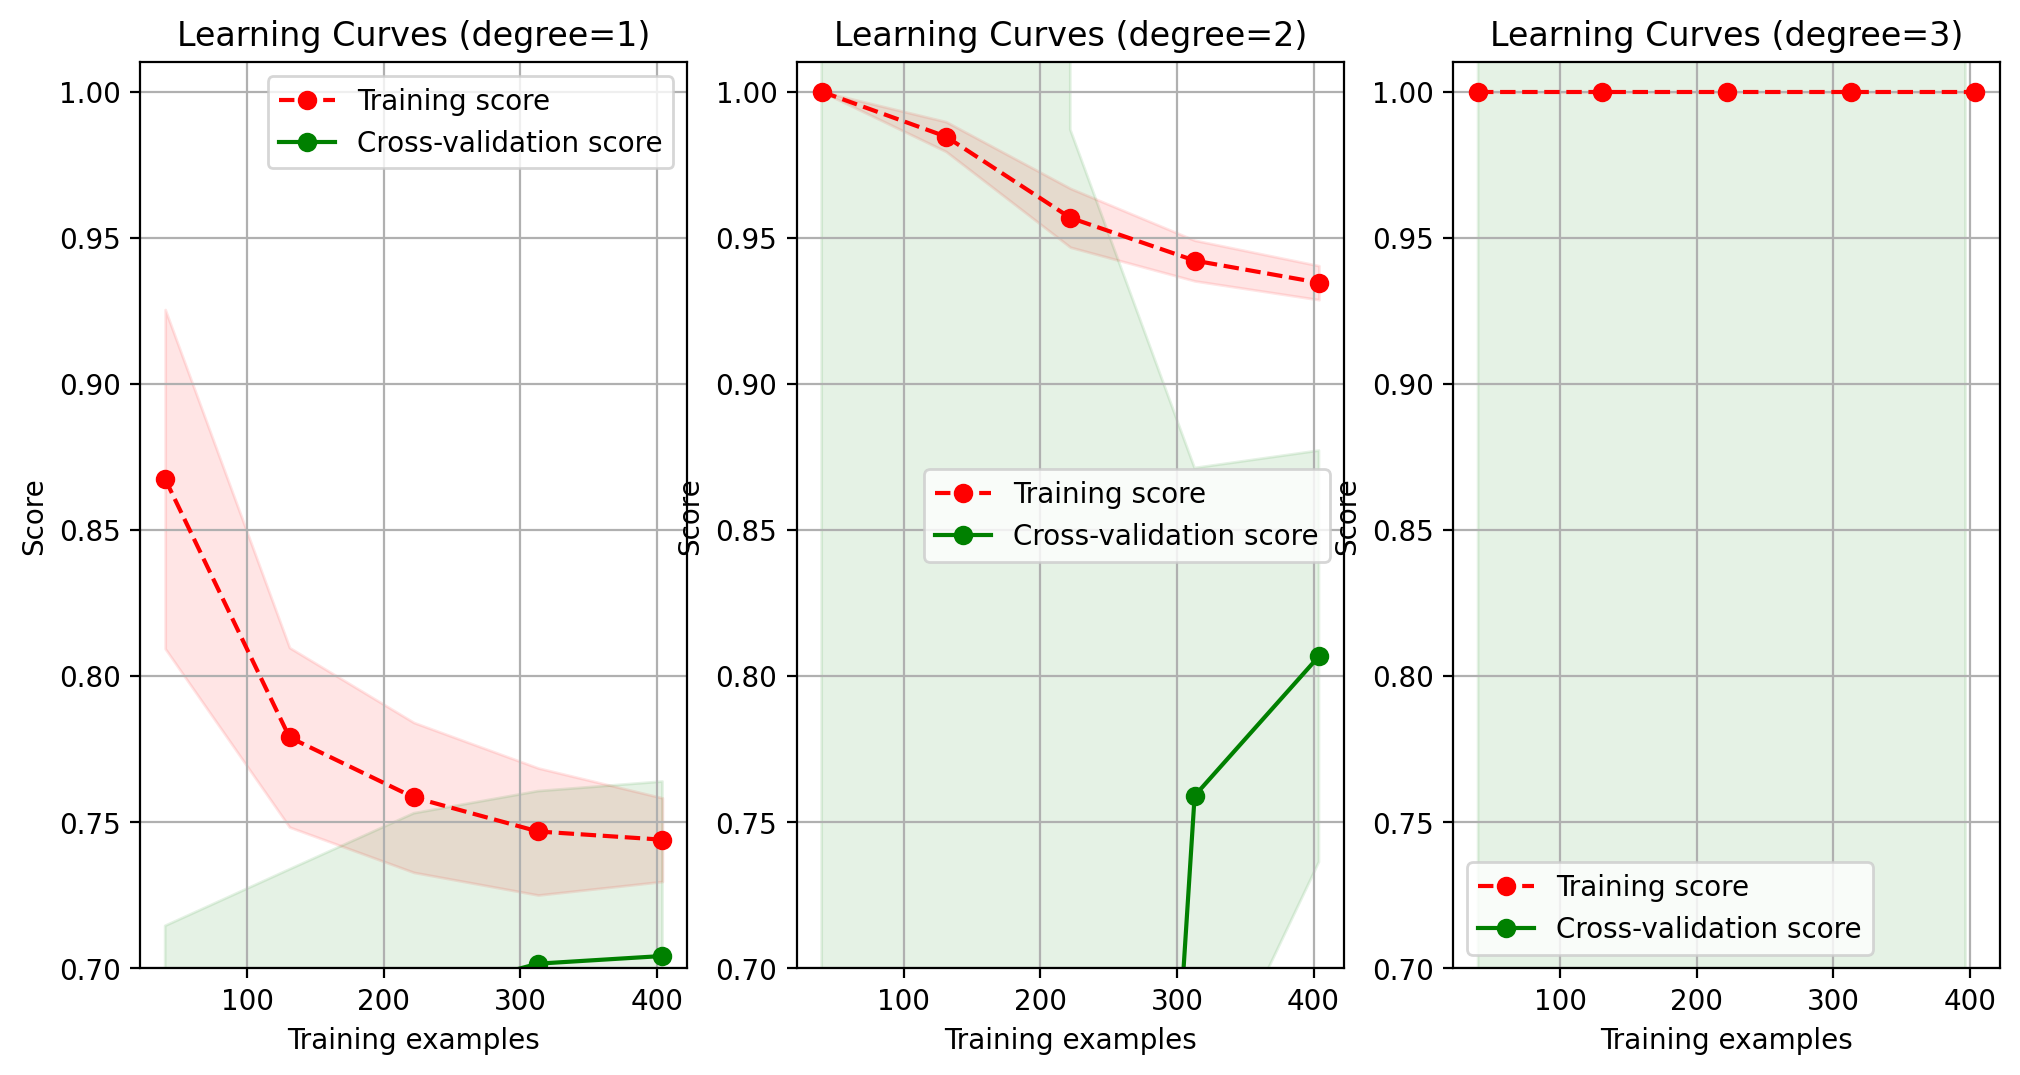

In [14]:
from sklearn.model_selection import ShuffleSplit
from matplotlib import pyplot as plt
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
plt.figure(figsize=(12, 6), dpi=200)
title = "Learning Curves (degree={0})"
degrees = [1, 2, 3]

for i in range(len(degrees)):
    plt.subplot(1, 3, i + 1)
    plot_learning_curve(plt, polynomial_model(degrees[i]), title.format(
        degrees[i]), X, y, ylim=(0.7, 1.01), cv=cv)


从上图可以看出，当degree=2，增加特征后，可以提高模型性能，但当degree=3时，训练数据的决定性数为1，100%准确，但是测试数据是负的，基本完全错误，这明显是过拟合了。

# 第5题

下载数据Fish.csv。该数据集是鱼市销售中7种常见不同鱼类的记录。主要目的是根据鱼的身体结构的一些测量来估计鱼的重量。

1. 导入数据，显示数据基本信息。
2. 数据清洗
 - 统计不同种类的鱼的直方图。
 - 分析不同特征与鱼的重量的关系。
 - 分析并清理异常值。(使用箱型图方法)
 - 特征相关性分析(删除高度线性相关的特征可能可以提高预测精度）
3. 根据上述分析，选择合适的特征，建立预测鱼体重的回归模型，并计算模型的平均平方误差MSE，平均绝对误差MAE和决定系数R^2系数

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei'] # （显示中文字体）
plt.rcParams['axes.unicode_minus'] = False   # （显示负号）

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

c:\Users\mjye\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [17]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [18]:
# 查看数据情况
df.shape, df.dtypes

((159, 7),
 Species     object
 Weight     float64
 Length1    float64
 Length2    float64
 Length3    float64
 Height     float64
 Width      float64
 dtype: object)

In [19]:
# 概要统计
df.describe().style.background_gradient(cmap = "rainbow")

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## 数据清洗

### 查看缺失值

In [20]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

说明没有缺失值

### 分析鱼种类分布

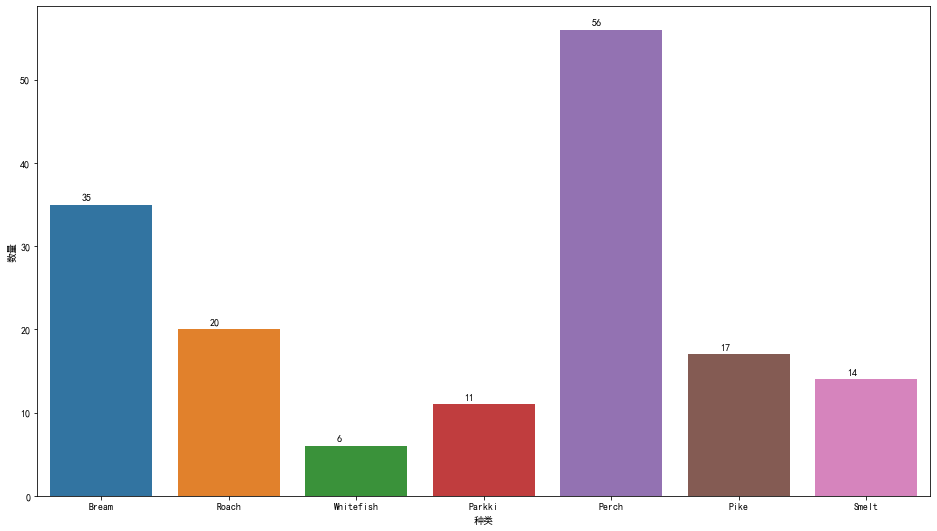

In [21]:
plt.figure(figsize=(16, 9))
ax = sns.countplot(x='Species', data=df)
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + 0.25, p.get_height() + 0.5))
plt.xlabel("种类")
plt.ylabel("数量")
plt.xticks(rotation=0)
plt.show()


总共有7种鱼类，其中鲈鱼的数量最多。

### 分析不同特征与鱼体重的关系

<Figure size 1080x432 with 0 Axes>

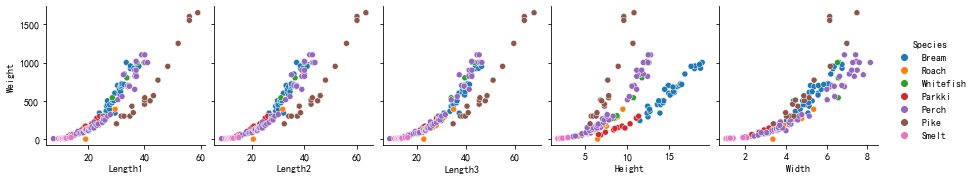

In [22]:
plt.figure(figsize=(15, 6))
sns.pairplot(data=df,
             x_vars=['Length1', 'Length2', 'Length3', 'Height', 'Width'],
             y_vars='Weight',
             hue='Species')
plt.show()


从上图可以看到，鱼体重与所有其他特征都有线性关系。需要通过相关性矩阵来检测不同特征是否存在相关性（多重共线性）。

<Figure size 1080x432 with 0 Axes>

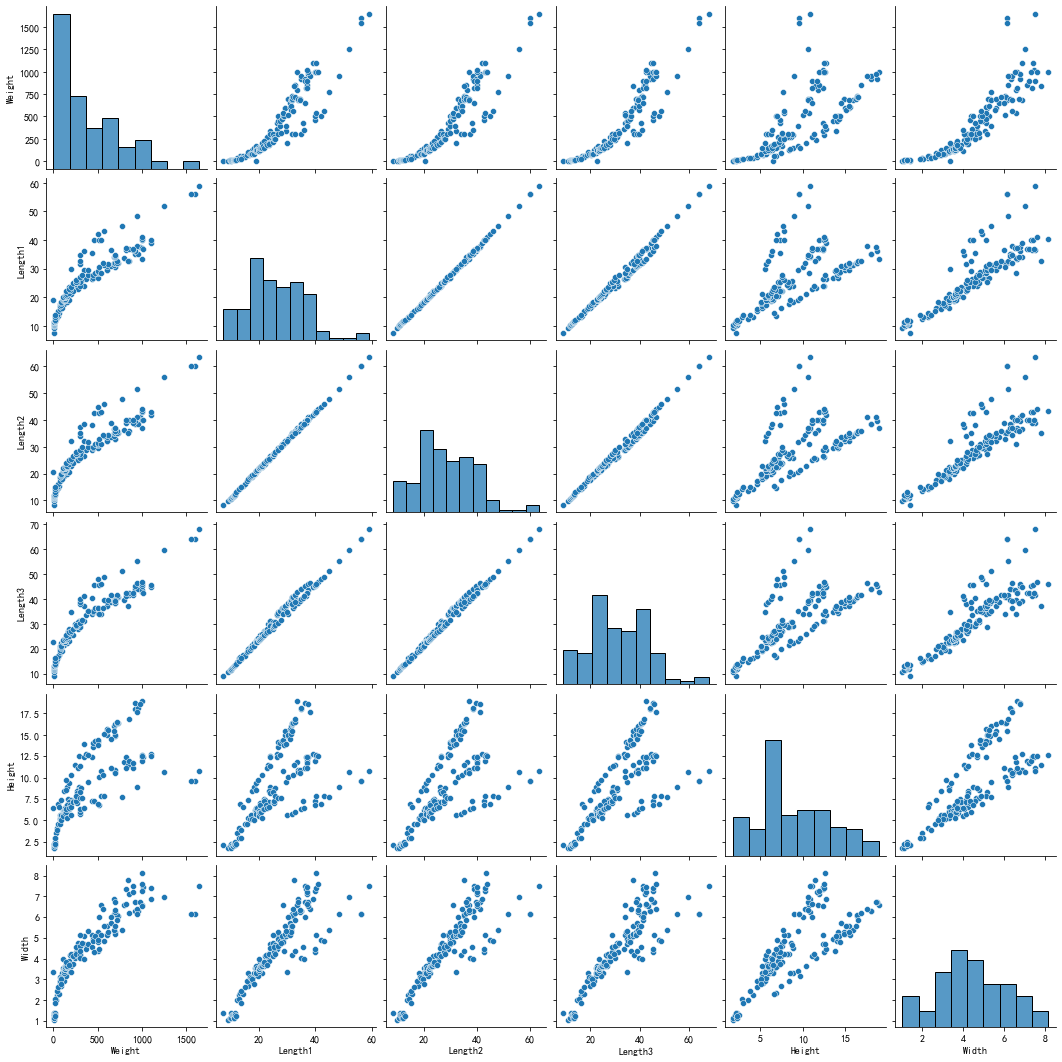

In [23]:
plt.figure(figsize=(15, 6))
sns.pairplot(data=df, diag_kind='hist')
plt.show()


从上图可以看出，体重Weight数据有右倾趋势，其它数据基本符合正态分布。

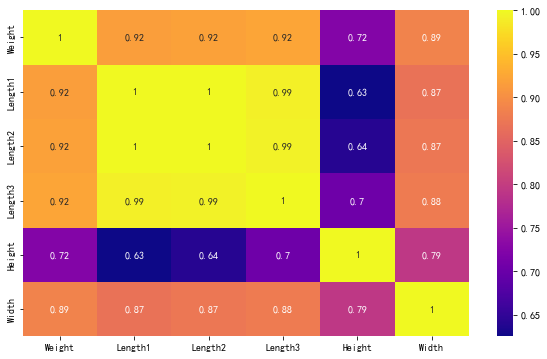

In [24]:
# plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='plasma')
plt.show()


从相关性矩阵可以看出，特征length1，length2，length3存在多重共线性，可能需要去除两个冗余的特征。可以通过计算方差扩大因子（Variance inflation factor，VIF），确定删除哪些特征。

### 异常值处理

1. 异常值检测

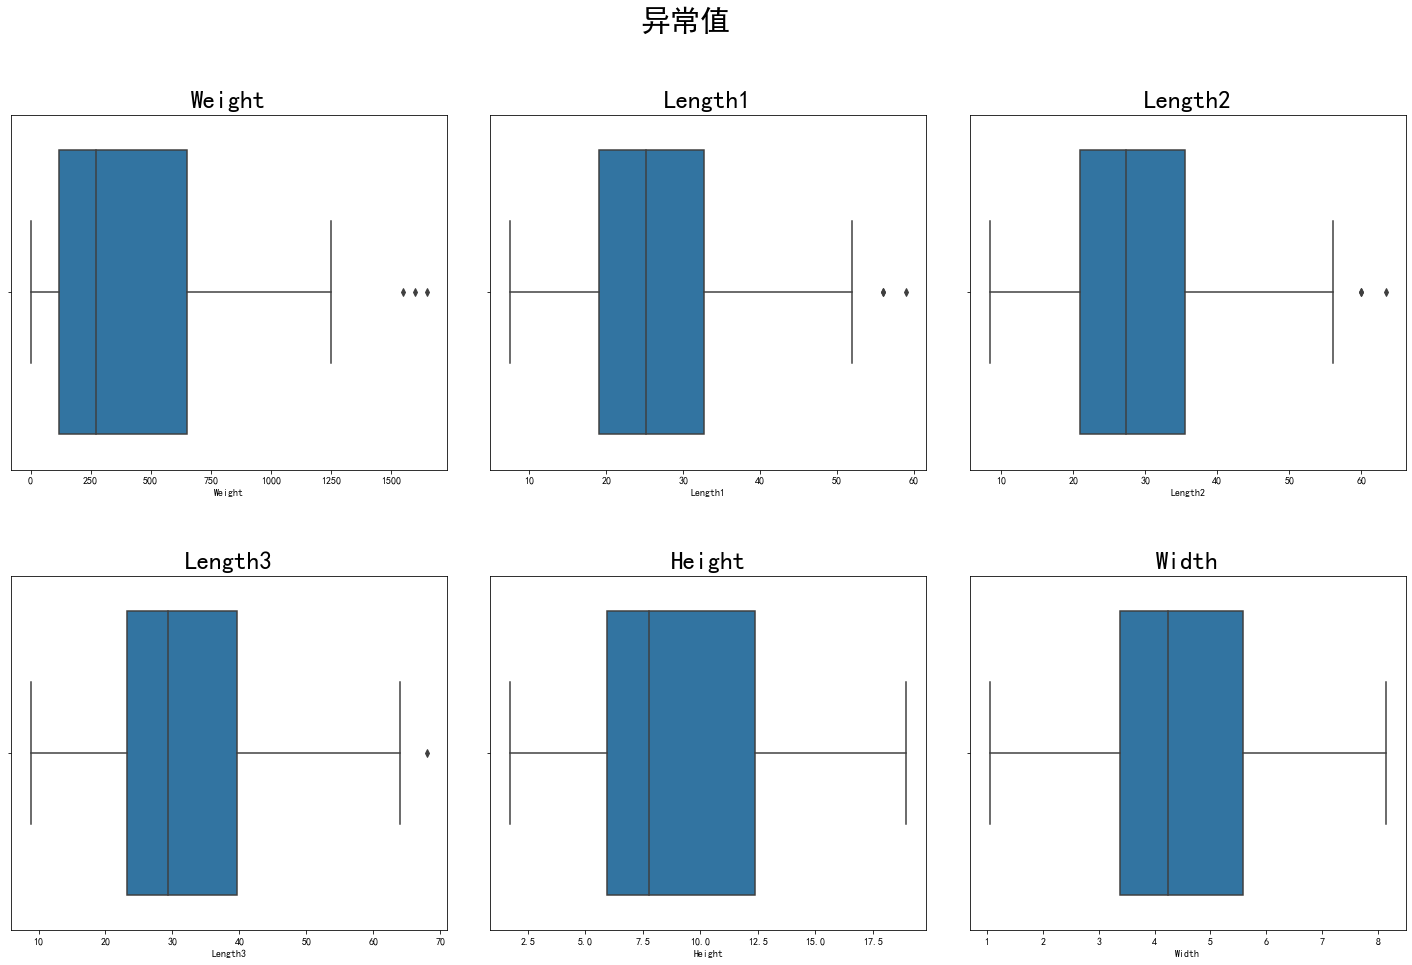

In [25]:
numerical_features = df.columns[1:]
fig, axes = plt.subplots(2, 3, figsize=(25, 15))
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('异常值', fontsize=30)
axes = axes.ravel()
for i, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col, fontsize=25)


In [26]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    return 'No Outliers Present' if len(outliers) == 0 else outliers


In [27]:
for col in numerical_features:
    print('-' * 27, col,'-' * 26)
    print(detect_outliers(df, col))
    print('\n')

--------------------------- Weight --------------------------
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480


--------------------------- Length1 --------------------------
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480


--------------------------- Length2 --------------------------
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480


--------------------------- Length3 --------------------------

0值检测

In [28]:
df.eq(0).any()

Species    False
Weight      True
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

可以发现，Weight存在0值。接下来要定位哪一条记录。

In [29]:
df[(df["Weight"] == 0)]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


2. 删除异常数据

In [30]:
# lets drop outliers 
df.drop([40,142,143,144], axis=0, inplace=True)

3. 多重共线性特征

In [31]:
X_collinearity = df[df.columns[2:]]
y_collinearity = df['Weight']
X_sm = sm.add_constant(X_collinearity)
sm_model = sm.OLS(y_collinearity,X_sm).fit()

In [32]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     283.0
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           3.64e-74
Time:                        10:54:44   Log-Likelihood:                -930.90
No. Observations:                 155   AIC:                             1874.
Df Residuals:                     149   BIC:                             1892.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -423.5948     25.508    -16.606      0.0

In [33]:
def VIF():
    vif = pd.DataFrame()
    vif['features'] = X_collinearity.columns
    vif['VIF'] = [variance_inflation_factor(X_collinearity.values, i) for i in range(X_collinearity.shape[1])]
    
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [34]:
vif = VIF()
vif

,features,VIF
1,Length2,15416.19
0,Length1,11817.90
2,Length3,3163.29
4,Width,96.71
3,Height,75.87


In [35]:
X_collinearity.drop(['Length2'], axis=1, inplace=True)

X_sm = sm.add_constant(X_collinearity)
sm_model = sm.OLS(y_collinearity,X_sm).fit()

C:\Users\mjye\AppData\Local\Temp\ipykernel_22312\162498908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_collinearity.drop(['Length2'], axis=1, inplace=True)


In [36]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     351.0
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           4.84e-75
Time:                        10:54:45   Log-Likelihood:                -931.92
No. Observations:                 155   AIC:                             1874.
Df Residuals:                     150   BIC:                             1889.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -429.1037     25.286    -16.970      0.0

In [37]:
vif = VIF()
vif

,features,VIF
1,Length3,2556.16
0,Length1,2370.96
3,Width,84.32
2,Height,74.45


In [38]:
X_collinearity.drop(['Length3'], axis=1, inplace=True)

X_sm = sm.add_constant(X_collinearity)
sm_model = sm.OLS(y_collinearity,X_sm).fit()

C:\Users\mjye\AppData\Local\Temp\ipykernel_22312\2620987362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_collinearity.drop(['Length3'], axis=1, inplace=True)


In [39]:
vif = VIF()
vif

,features,VIF
2,Width,57.60
0,Length1,37.91
1,Height,14.99


删除相关性特征

In [40]:
df.drop(['Length2', 'Length3'], axis=1, inplace=True)

## 数据处理

In [41]:
X = df.drop(['Weight'], axis=1)
y = df['Weight']

将种类数据编码为数值，将其它特征数据中心化。

In [42]:
# 创建数据变换pipeline

# onehot encoder
categorical_pipeline = Pipeline(
    steps=[
        ("onehot-encoder", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

# standard scaler
numeric_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler())
    ]
)


In [43]:
# ['Length1', 'Height', 'Width']三个数值特征应用中心化变换，['Species']种类特征应用onehot encoder变换
full_processor = ColumnTransformer(
    transformers=[
        ("numerical", numeric_pipeline, ['Length1', 'Height', 'Width']),
        ("categorical", categorical_pipeline, ['Species']),
    ]
)


In [44]:
# 数据变换，将X原来的4个特征变成10个特征，因为Species包含7类，onehot encoder后变换7列特征
X_processed = full_processor.fit_transform(X)
y_processed = StandardScaler().fit_transform(y.values.reshape(-1, 1))


In [45]:
# 8:2 比例分割训练和测试数据
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=20220926)


In [46]:
# 模型评估函数
def evaluate_model(y_pred, y_test):
    MSE = round(mean_squared_error(y_test, y_pred), 2)
    MAE = round(mean_absolute_error(y_test, y_pred), 2)
    r2score = round(r2_score(y_test, y_pred), 2)
    return MSE, MAE, r2score


In [47]:
# 建立不同的模型
models = [LinearRegression(),
          Ridge(),
          DecisionTreeRegressor(random_state=20220926),
          RandomForestRegressor(random_state=20220926),
          XGBRegressor(random_state=20220926)]

model_names = ['Linear Regression', 'Ridge',
               'Decision Tree', 'Random Forest', 'XGBoost']


In [48]:
def build_models(models, model_names):
    mse = []
    mae = []
    r2 = []
    results = {}

    for idx, (ml_model_names, ml_models) in enumerate(zip(model_names, models)):
        lr = models[idx]
        lr.fit(X_train, y_train.ravel())
        y_pred = lr.predict(X_test)
        MSE, MAE, r2score = evaluate_model(y_test, y_pred)
        mse.append(MSE)
        mae.append(MAE)
        r2.append(r2score)

    results = {'Model': model_names,
               'MSE': mse,
               'MAE': mae,
               'R2 Score': r2}

    return pd.DataFrame(results)


In [49]:
models_scores_df = build_models(models, model_names)
models_scores_df


,Model,MSE,MAE,R2 Score
0,Linear Regression,0.05,0.17,0.96
1,Ridge,0.05,0.18,0.96
2,Decision Tree,0.06,0.13,0.96
3,Random Forest,0.01,0.07,0.99
4,XGBoost,0.02,0.08,0.99
